Разведовательный анализ данных

Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Задачи проекта:
1. Провести первичную обработку данных.
2. Посмотреть на распределение признака для числовых переменных, устраните выбросы.
3. Оценить количество уникальных значений для номинативных переменных.
4. Провести корреляционный анализ количественных переменных, отобрать не коррелирующие переменные.
5. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину.
6. Сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 70) # выведем больше строк

pd.set_option('display.max_columns', 70) # выведем больше колонок

stud_math = pd.read_csv('D:\Aston\Pyton\skill\stud_math.csv')

In [2]:
display(stud_math.head(10))

stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [3]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
# переименовали колонки для удобства обращения к ним

In [5]:
# Для анализа были оставлены данные только с заполненым полем score - 389 случаев. Заполнять пропуски в этом случае не совсем корректно
stud_math=stud_math[stud_math.score.notnull()]

In [6]:
stud_math.describe(include = ['float64', 'int64'])
# видим ошибочно введенные данные в столбцах 'fedu', 'famrel'

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,389.000000,386.000000,365.000000,361.000000,382.000000,367.000000,382.000000,362.000000,380.000000,382.000000,374.000000,378.000000,389.000000
mean,16.673522,2.766839,2.627397,1.434903,2.036649,0.326975,-6.109948,3.930939,3.223684,3.094241,3.529412,7.320106,52.262211
std,1.265662,1.094277,2.241790,0.692660,0.847239,0.729479,2.541716,0.931554,0.993364,1.116104,1.402006,23.615525,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [7]:
# проверим еще раз введенные значения в количественных столбцах для номинальных признаков, еще раз видим ошибки в столбцах 'fedu', 'famrel'
stud_math_num=stud_math.select_dtypes(include = ['float64', 'int64'])
stud_math_num.columns
for item in stud_math_num.columns.tolist():
     print(pd.DataFrame(stud_math_num[item].value_counts()))
# заменим значения в столбцах 'fedu', 'famrel'        
stud_math['fedu'] = stud_math['fedu'].replace(40, 4)
stud_math['famrel'] = stud_math['famrel'].replace(-1, 1)

    age
16  103
17   98
15   82
18   80
19   21
20    3
22    1
21    1
     medu
4.0   131
2.0   100
3.0    96
1.0    56
0.0     3
      fedu
2.0    105
3.0     94
4.0     88
1.0     75
0.0      2
40.0     1
     traveltime
1.0         239
2.0          94
3.0          21
4.0           7
     studytime
2.0        189
1.0        103
3.0         63
4.0         27
     failures
0.0       290
1.0        48
2.0        15
3.0        14
       studytime_granular
-6.0                  189
-3.0                  103
-9.0                   63
-12.0                  27
      famrel
 4.0     178
 5.0      97
 3.0      62
 2.0      17
 1.0       7
-1.0       1
     freetime
3.0       152
4.0       110
2.0        63
5.0        37
1.0        18
     goout
3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
     health
5.0     137
3.0      88
4.0      60
1.0      47
2.0      42
       absences
0.0         110
2.0          60
4.0          52
6.0          30
8.0          20
10.0         17
12.0       

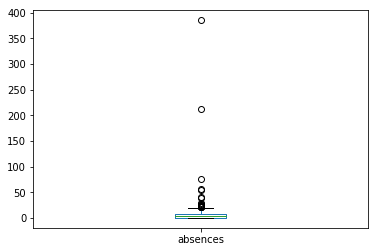

In [8]:
stud_math.boxplot(column='absences', grid=False)
# Два явных выброса 385 (так как следующее поле score 85, текущее поле можно заполнить 3)
# и 212 (в принципе,возможно, такое кол-во пропусков,тогда целесообразнее исключить этого учащегося из анализа,
#второй вариант, так как со здоровьем по результатам анкеты у него нет проблем, что 212=2+1+2=5)
# заменим значения в столбце 'absences'  
stud_math['absences'] = stud_math['absences'].replace(385, 3)
stud_math['absences'] = stud_math['absences'].replace(212, 5)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


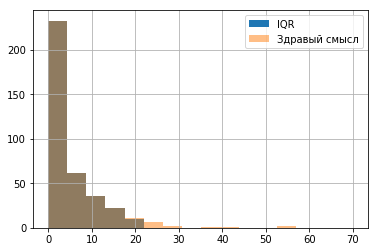

In [9]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (0, 70), 
                                                                                             label = 'IQR')
stud_math.absences.loc[stud_math.absences <= 80].hist(alpha = 0.5, bins = 16, range = (0, 70),
                                                        label = 'Здравый смысл')
plt.legend()

In [10]:
#Пропущенные значения переменной absences заменим медианным значением
stud_math['absences_new'] = stud_math.apply(lambda x: median if pd.isnull(x['absences']) else x['absences'], axis =  1)

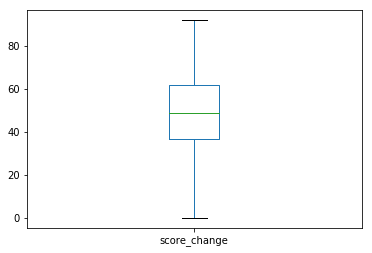

In [11]:
# Предположение. В переменной studytime_granular вычисляется оценка влияния
# studytime (времени на учёбу помимо школы в неделю) на общую успеваемость умноджением количества часов на -3.
# т.е. это дополнительное "натаскивание" ученика на результат, без которого его бы итоговая оценка была бы меньше на это число баллов
# Поэтому итоговая переменная, отражающая реальную успеваемость по математике будет складываться из двух переменных. 
# stud_math['score_change']=stud_math['score']+stud_math['studytime_granular']
stud_math['studytime_granular']=stud_math['studytime_granular'].fillna(0)
stud_math['score_change']=stud_math['score']+stud_math['studytime_granular']
# все полученные отрицательные значения меняем на 0
stud_math['score_change']= stud_math['score_change'].replace(-12, 0)
stud_math['score_change']= stud_math['score_change'].replace(-9, 0)
stud_math['score_change']= stud_math['score_change'].replace(-6, 0)
stud_math['score_change']= stud_math['score_change'].replace(-3,0)
stud_math.boxplot(column='score_change', grid=False)

In [12]:
stud_math_nominal=stud_math.select_dtypes(include = ['object'])

In [13]:
stud_math.describe(include = ['object'])

,school,sex,address,famsize,p_status,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,389,389,374,362,344,370,353,372,358,380,351,350,375,374,369,355,358
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,344,204,291,255,308,127,194,135,248,331,216,197,192,297,350,300,235


In [14]:
pd.crosstab(stud_math['address'], [stud_math['school']], rownames=['address'], colnames=['school'])
# видим, что большинство учеников из школы GP имеют адрес U и наоборот.
# на основании этого заполним пропущенные значения в поле address

school,GP,MS
address,,
R,60,23
U,273,18


In [15]:
def conditions1(y):
    if y == 'GP':
        return "U"
    else:
        return "R"

stud_math['address_new'] = stud_math.apply(lambda x: conditions1(x['school']) if pd.isnull(x['address']) else x['address'], axis =  1)
pd.crosstab(stud_math['address_new'], [stud_math['school']], rownames=['address_new'], colnames=['school'])

school,GP,MS
address_new,,
R,60,27
U,284,18


In [16]:
#Заполним остальные номинальные переменные случайным образом в соответствии с % значений
def conditions2(y1,y2,t):
    rnd=np.random.rand(1)
    if rnd[0] <= t:
        return y1
    else:
        return y2
    
for col in ['famsize', 'p_status', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
  df=[]        
  df=pd.DataFrame(stud_math[col].value_counts(normalize = True ).reset_index())
  stud_math[col+'_new'] = stud_math.apply(lambda x: conditions2(df.iloc[0,0],df.iloc[1,0],df.iloc[0,1]) if pd.isnull(x[col]) else x[col], axis =  1)
stud_math.describe(include = ['object'])  

,school,sex,address,famsize,p_status,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,address_new,famsize_new,p_status_new,mjob_new,fjob_new,reason_new,guardian_new,schoolsup_new,famsup_new,paid_new,activities_new,nursery_new,higher_new,internet_new,romantic_new
count,389,389,374,362,344,370,353,372,358,380,351,350,375,374,369,355,358,389,389,389,389,389,389,389,389,389,389,389,389,389,389,389
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,344,204,291,255,308,127,194,135,248,331,216,197,192,297,350,300,235,302,274,350,135,203,143,271,339,245,218,198,308,366,329,260


In [17]:
#обновим значение переменной stud_math_nominal
stud_math_nominal=stud_math.select_dtypes(include = ['object'])

In [18]:
stud_math.corr(method='spearman').style.background_gradient(cmap='Blues').format("{:.2f}")

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score,absences_new,score_change
age,1.00,-0.14,-0.14,0.11,0.02,0.20,-0.02,0.03,-0.01,0.14,-0.08,0.14,-0.16,0.14,-0.16
medu,-0.14,1.00,0.63,-0.14,0.08,-0.24,-0.08,0.01,0.04,0.07,-0.04,0.10,0.22,0.10,0.21
fedu,-0.14,0.63,1.00,-0.12,0.05,-0.26,-0.05,-0.01,-0.02,0.06,0.02,0.01,0.15,0.02,0.15
traveltime,0.11,-0.14,-0.12,1.00,-0.11,0.05,0.10,-0.05,-0.04,0.01,-0.04,-0.03,-0.08,-0.03,-0.06
studytime,0.02,0.08,0.05,-0.11,1.00,-0.17,-1.00,0.06,-0.11,-0.06,-0.09,-0.05,0.12,-0.04,0.00
failures,0.20,-0.24,-0.26,0.05,-0.17,1.00,0.17,-0.01,0.09,0.09,0.11,0.10,-0.35,0.10,-0.34
studytime_granular,-0.02,-0.08,-0.05,0.10,-1.00,0.17,1.00,-0.05,0.12,0.06,0.09,0.05,-0.10,0.05,0.03
famrel,0.03,0.01,-0.01,-0.05,0.06,-0.01,-0.05,1.00,0.16,0.07,0.08,-0.08,0.06,-0.08,0.06
freetime,-0.01,0.04,-0.02,-0.04,-0.11,0.09,0.12,0.16,1.00,0.29,0.08,0.02,0.01,0.02,0.02
goout,0.14,0.07,0.06,0.01,-0.06,0.09,0.06,0.07,0.29,1.00,-0.03,0.13,-0.16,0.13,-0.16


In [19]:
# Средняя корреляционная связь выявлена только между уровнем образования отца и матери,
# можно из двух переменных сделать одну - максимальный уровень образования
stud_math['parents_edu']=stud_math[['medu','fedu']].max(axis =1)
#Аналогично заполним номинальные переменные, данные в которых представлены числами
for col in ['medu', 'fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'parents_edu']:
  df=[]        
  df=pd.DataFrame(stud_math[col].value_counts(normalize = True ).reset_index())
  stud_math[col+'_new'] = stud_math.apply(lambda x: conditions2(df.iloc[0,0],df.iloc[1,0],df.iloc[0,1]) if pd.isnull(x[col]) else x[col], axis =  1)
# пересчитаем корреляционную матрицу
stud_math.corr(method='spearman').style.background_gradient(cmap='Blues').format("{:.2f}")

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score,absences_new,score_change,parents_edu,medu_new,fedu_new,traveltime_new,failures_new,famrel_new,freetime_new,goout_new,health_new,parents_edu_new
age,1.00,-0.14,-0.14,0.11,0.02,0.20,-0.02,0.03,-0.01,0.14,-0.08,0.14,-0.16,0.14,-0.16,-0.17,-0.14,-0.13,0.09,0.20,0.02,0.01,0.13,-0.08,-0.17
medu,-0.14,1.00,0.63,-0.14,0.08,-0.24,-0.08,0.01,0.04,0.07,-0.04,0.10,0.22,0.10,0.21,0.90,1.00,0.60,-0.11,-0.23,0.01,0.04,0.07,-0.04,0.90
fedu,-0.14,0.63,1.00,-0.12,0.05,-0.26,-0.05,-0.01,-0.02,0.06,0.02,0.01,0.15,0.02,0.15,0.81,0.63,1.00,-0.10,-0.25,-0.01,-0.03,0.06,0.01,0.81
traveltime,0.11,-0.14,-0.12,1.00,-0.11,0.05,0.10,-0.05,-0.04,0.01,-0.04,-0.03,-0.08,-0.03,-0.06,-0.11,-0.13,-0.13,1.00,0.06,-0.04,-0.03,0.02,-0.03,-0.11
studytime,0.02,0.08,0.05,-0.11,1.00,-0.17,-1.00,0.06,-0.11,-0.06,-0.09,-0.05,0.12,-0.04,0.00,0.08,0.09,0.04,-0.11,-0.17,0.05,-0.11,-0.06,-0.09,0.08
failures,0.20,-0.24,-0.26,0.05,-0.17,1.00,0.17,-0.01,0.09,0.09,0.11,0.10,-0.35,0.10,-0.34,-0.27,-0.24,-0.25,0.04,1.00,-0.02,0.09,0.09,0.11,-0.27
studytime_granular,-0.02,-0.08,-0.05,0.10,-1.00,0.17,1.00,-0.05,0.12,0.06,0.09,0.05,-0.10,0.05,0.03,-0.09,-0.08,-0.05,0.09,0.18,-0.04,0.12,0.06,0.08,-0.09
famrel,0.03,0.01,-0.01,-0.05,0.06,-0.01,-0.05,1.00,0.16,0.07,0.08,-0.08,0.06,-0.08,0.06,0.02,0.01,-0.02,-0.05,-0.02,1.00,0.16,0.07,0.07,0.02
freetime,-0.01,0.04,-0.02,-0.04,-0.11,0.09,0.12,0.16,1.00,0.29,0.08,0.02,0.01,0.02,0.02,0.03,0.04,-0.02,-0.04,0.08,0.14,1.00,0.29,0.06,0.03
goout,0.14,0.07,0.06,0.01,-0.06,0.09,0.06,0.07,0.29,1.00,-0.03,0.13,-0.16,0.13,-0.16,0.06,0.07,0.04,0.01,0.08,0.07,0.28,1.00,-0.02,0.06


In [20]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

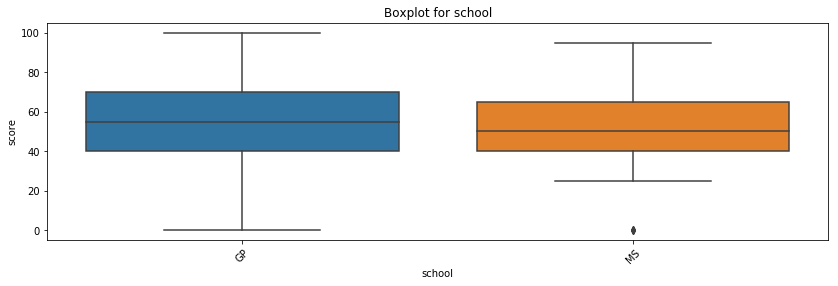

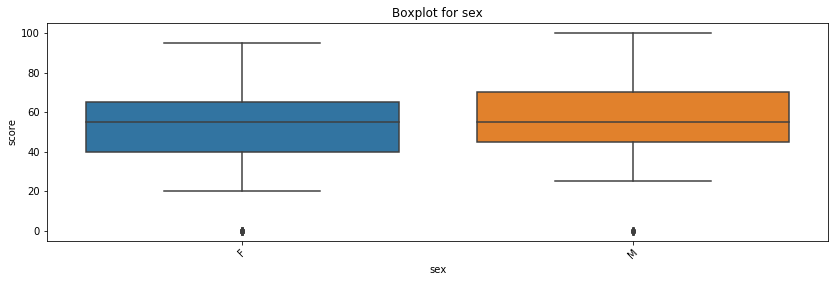

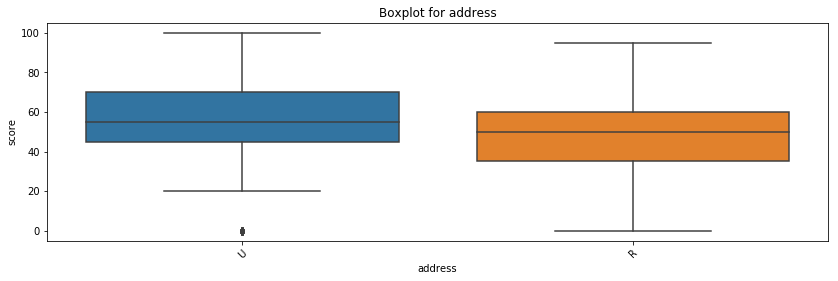

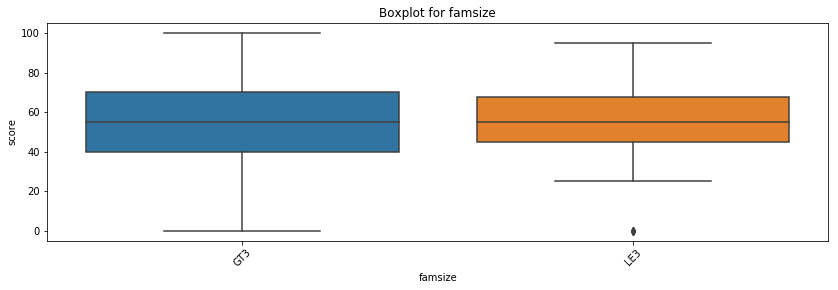

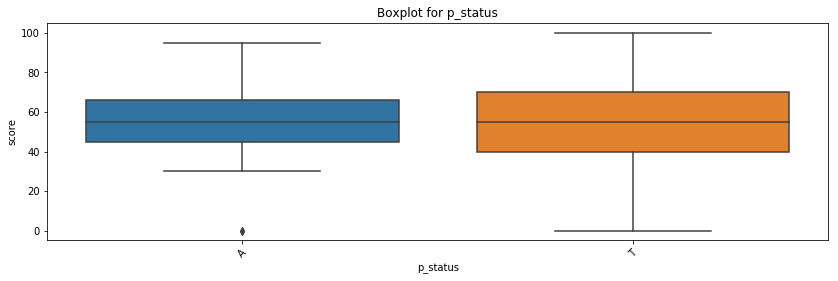

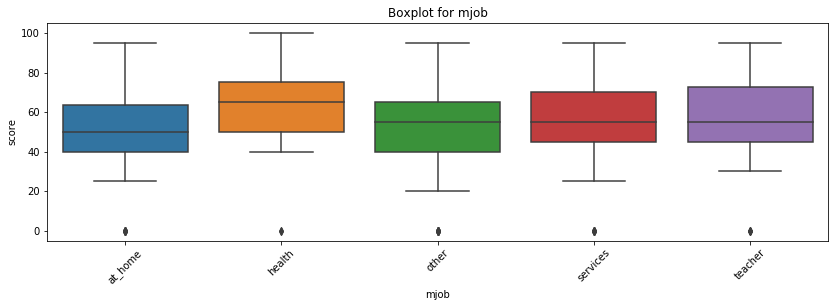

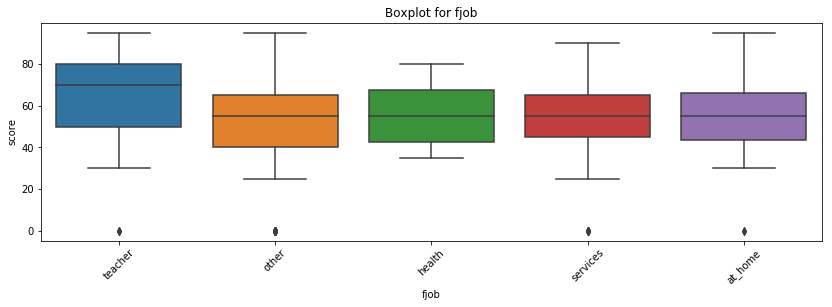

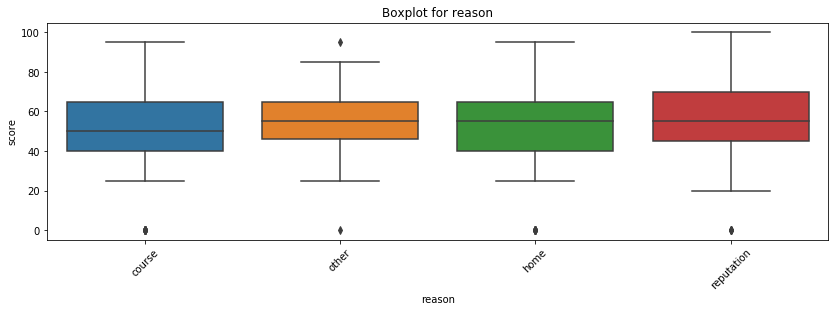

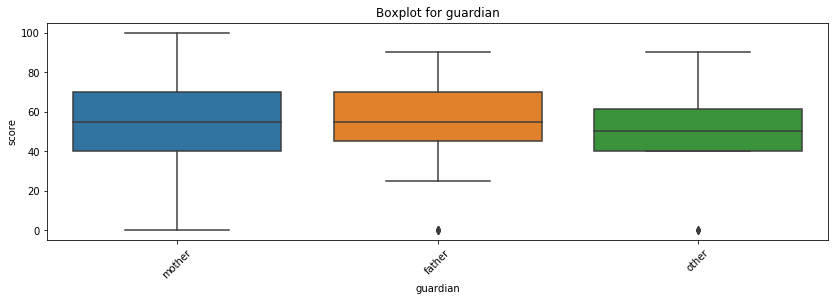

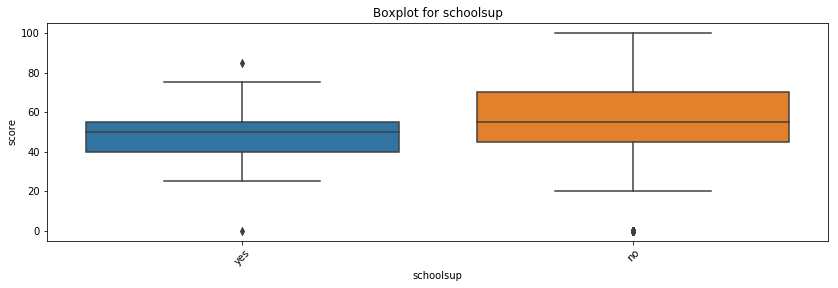

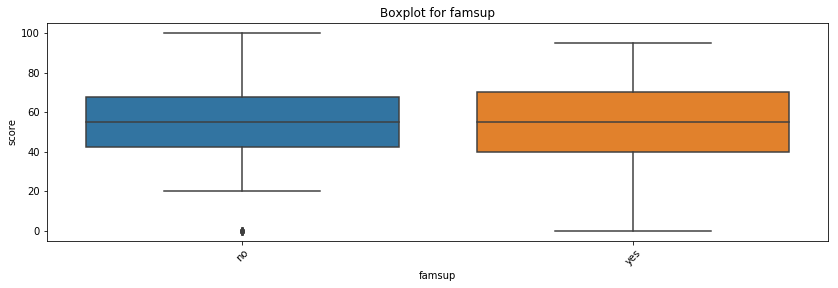

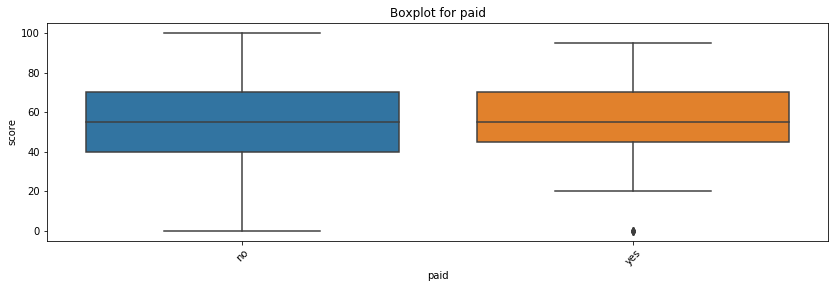

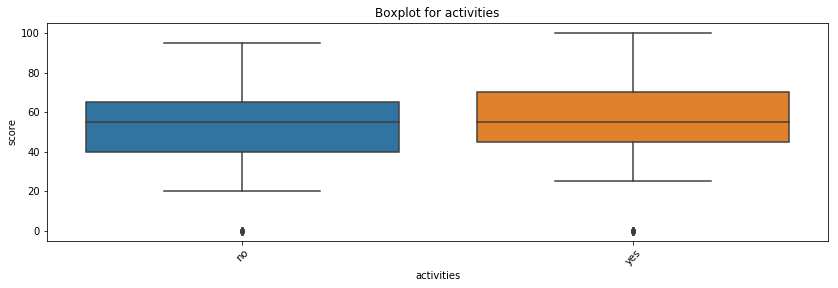

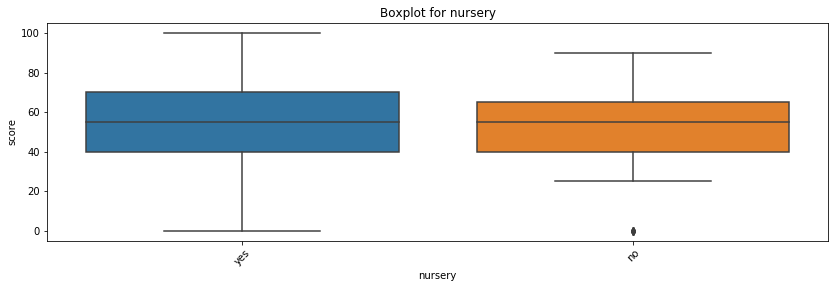

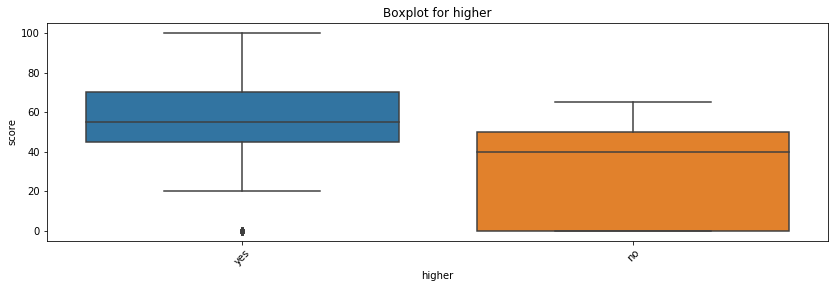

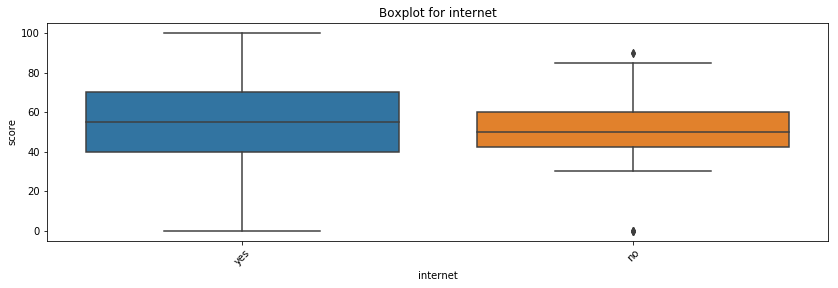

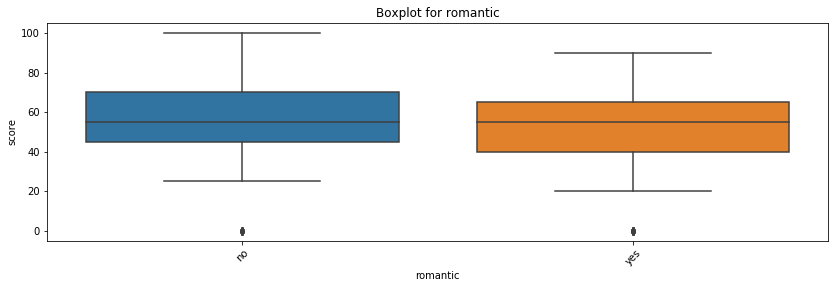

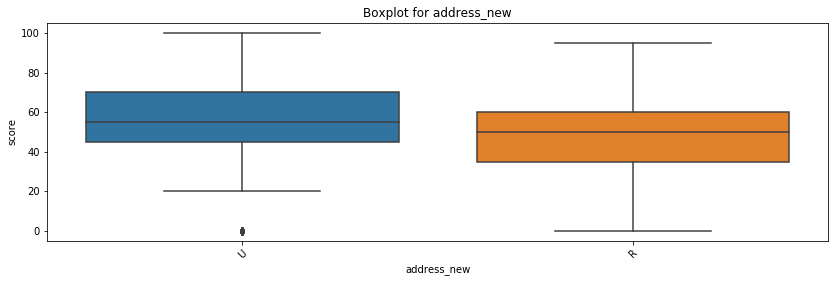

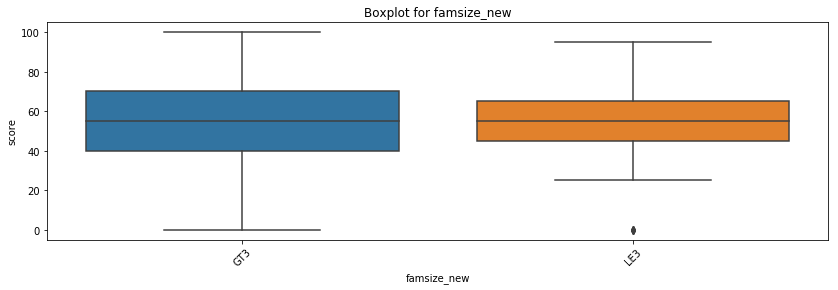

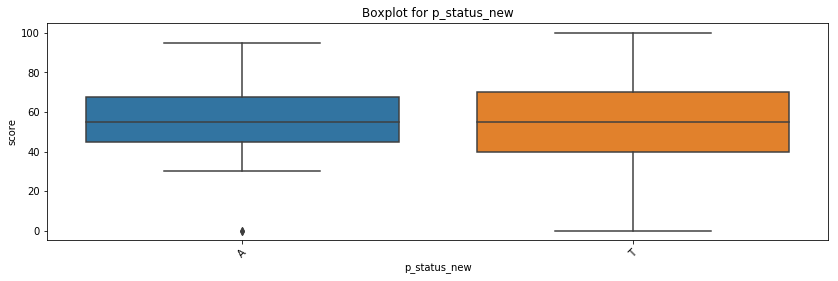

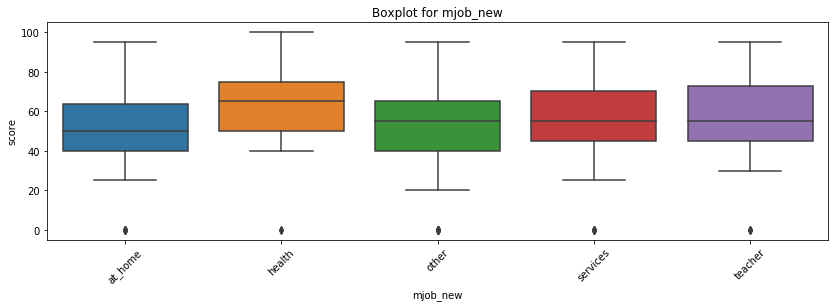

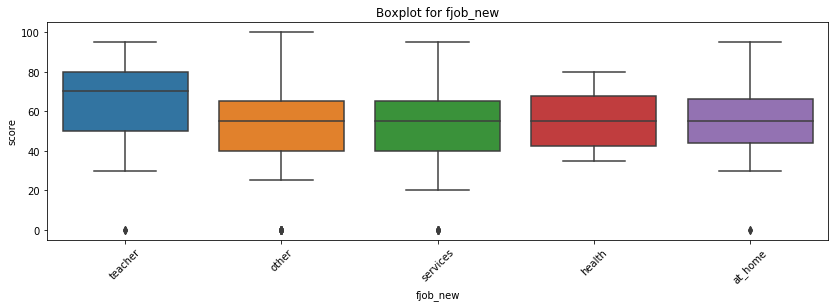

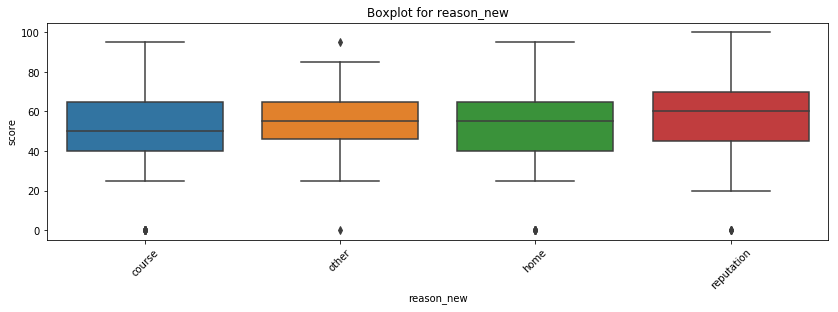

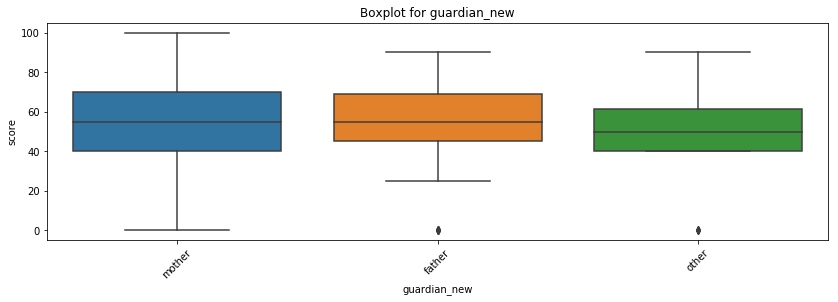

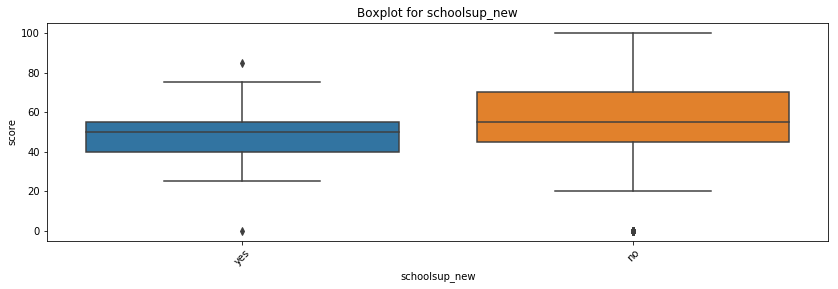

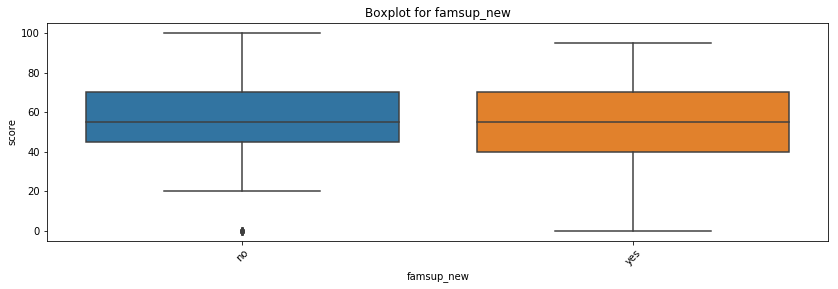

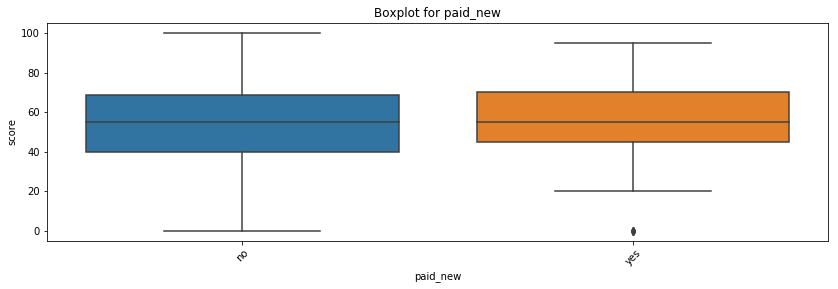

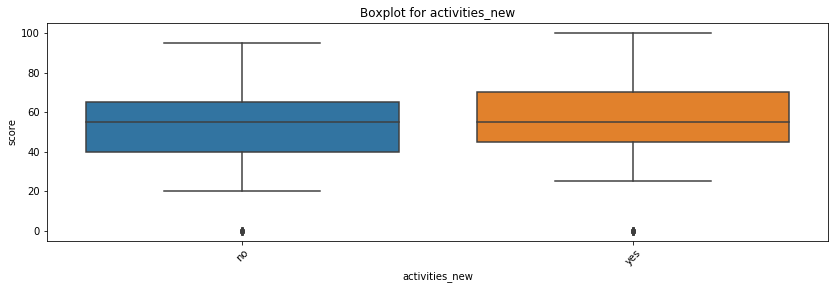

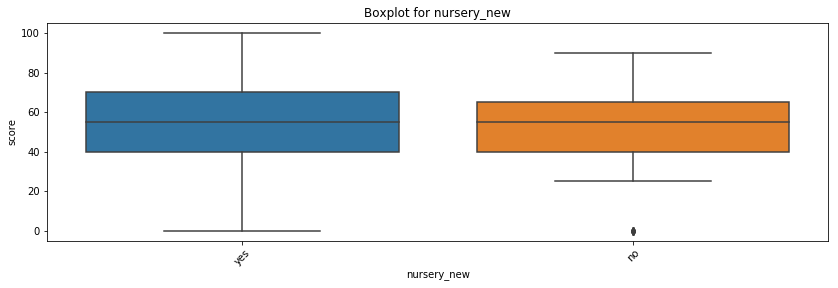

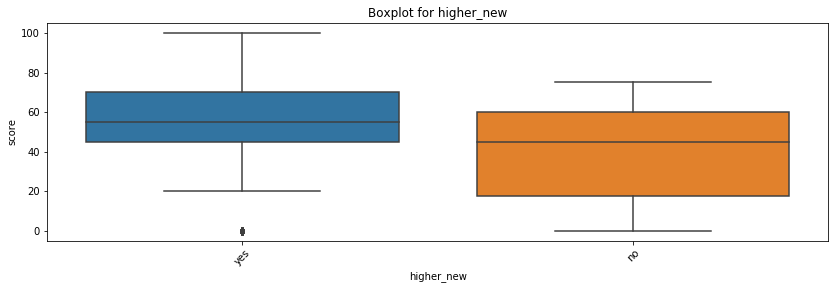

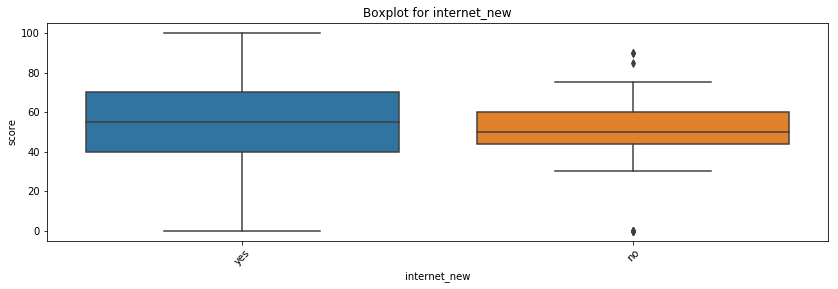

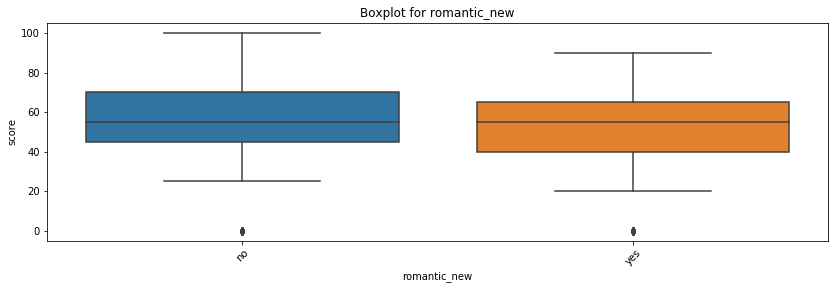

In [21]:
stud_math_nominal=stud_math.select_dtypes(include = ['object'])
for col in stud_math_nominal.columns.tolist():
    get_boxplot(col)

In [22]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column, comb,ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue)
        else:
            print('Не найдены статистически значимые различия для колонки', column, comb,ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue)   

In [23]:
for col in stud_math_nominal.columns.tolist():
    get_stat_dif(col)
# с помощью t-test выявлено значимое различие только в результатах между учащемися двух групп в зависимости от образования матери ('at_home', 'health')
# у матерей, работающих в сфере здравоохранения, дети достигают более высоких результатов в математике и скорее всего не попадут в группу риска

Не найдены статистически значимые различия для колонки school ('GP', 'MS') 0.38116035441953655
Не найдены статистически значимые различия для колонки sex ('F', 'M') 0.05037778594548768
Найдены статистически значимые различия для колонки address ('U', 'R') 0.020199635381958233
Не найдены статистически значимые различия для колонки famsize ('GT3', 'LE3') 0.22941579275557825
Не найдены статистически значимые различия для колонки p_status ('T', 'A') 0.3951929976086561
Не найдены статистически значимые различия для колонки mjob ('other', 'services') 0.08328709243985477
Не найдены статистически значимые различия для колонки mjob ('other', 'at_home') 0.28099083648817647
Не найдены статистически значимые различия для колонки mjob ('other', 'teacher') 0.11196134034066857
Не найдены статистически значимые различия для колонки mjob ('other', 'health') 0.010545425066974893
Не найдены статистически значимые различия для колонки mjob ('services', 'at_home') 0.020614443768010304
Не найдены статистиче

In [24]:
# следующие признаки тоже можно расмотреть как номинальные
for col in ['studytime', 'medu', 'fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'parents_edu', 'medu_new', 'fedu_new', 'traveltime_new', 'failures_new', 'famrel_new', 'freetime_new', 'goout_new', 'health_new', 'parents_edu_new']:
    get_stat_dif(col)
# Нигде статистически значимые различия не найдены    

Не найдены статистически значимые различия для колонки studytime (2.0, 1.0) 0.6246800201191558
Не найдены статистически значимые различия для колонки studytime (2.0, 3.0) 0.02878204889823433
Не найдены статистически значимые различия для колонки studytime (2.0, 4.0) 0.23144225511766403
Не найдены статистически значимые различия для колонки studytime (1.0, 3.0) 0.029403344406121436
Не найдены статистически значимые различия для колонки studytime (1.0, 4.0) 0.20517101675240013
Не найдены статистически значимые различия для колонки studytime (3.0, 4.0) 0.7860020713260022
Найдены статистически значимые различия для колонки medu (4.0, 2.0) 0.0016829286547296737
Не найдены статистически значимые различия для колонки medu (4.0, 3.0) 0.019990345295454542
Найдены статистически значимые различия для колонки medu (4.0, 1.0) 1.0022374750513067e-05
Не найдены статистически значимые различия для колонки medu (4.0, 0.0) 0.6196389508830781
Не найдены статистически значимые различия для колонки medu (2

Не найдены статистически значимые различия для колонки traveltime_new (1.0, 4.0) 0.7326103933071317
Не найдены статистически значимые различия для колонки traveltime_new (2.0, 3.0) 0.3305977124318299
Не найдены статистически значимые различия для колонки traveltime_new (2.0, 4.0) 0.8370916507097164
Не найдены статистически значимые различия для колонки traveltime_new (3.0, 4.0) 0.732688792006273
Найдены статистически значимые различия для колонки failures_new (0.0, 1.0) 4.856520232062487e-05
Найдены статистически значимые различия для колонки failures_new (0.0, 2.0) 3.488610280816114e-05
Найдены статистически значимые различия для колонки failures_new (0.0, 3.0) 7.363584523717775e-06
Не найдены статистически значимые различия для колонки failures_new (1.0, 2.0) 0.13310998324938425
Не найдены статистически значимые различия для колонки failures_new (1.0, 3.0) 0.06189477083468778
Не найдены статистически значимые различия для колонки failures_new (2.0, 3.0) 0.7513917973171969
Не найдены 

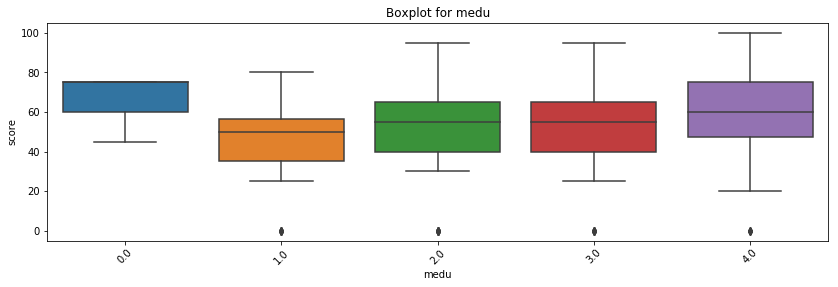

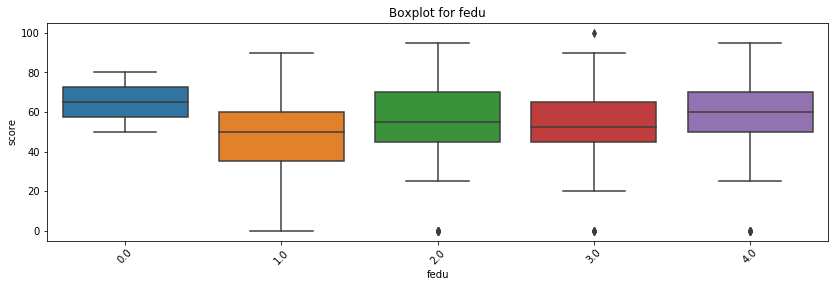

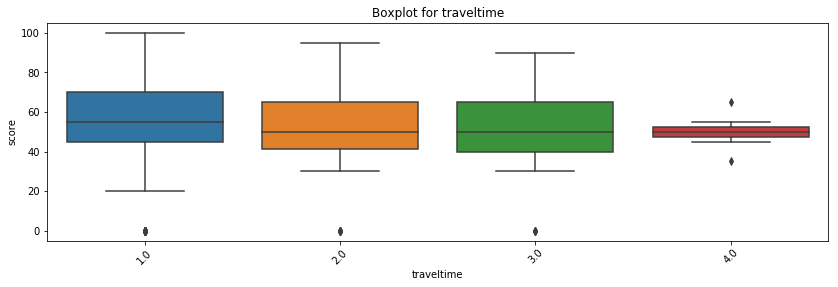

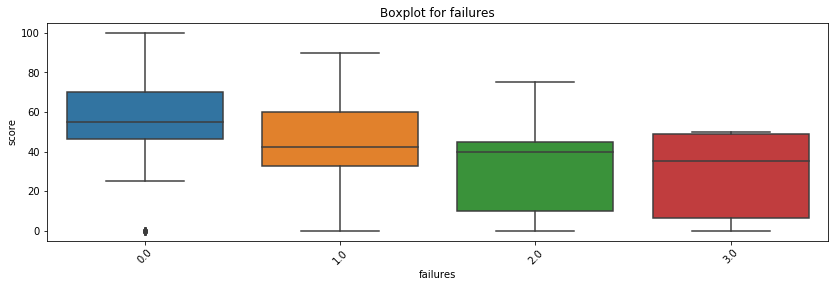

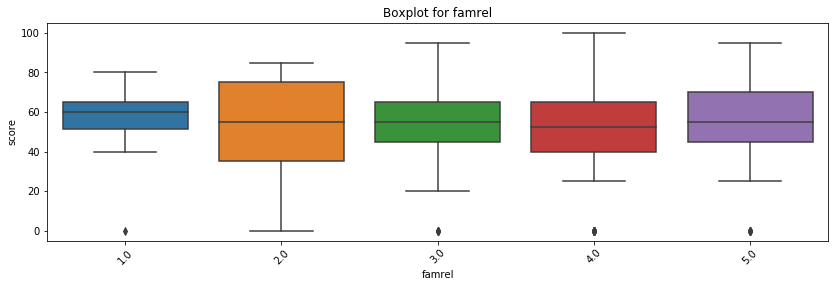

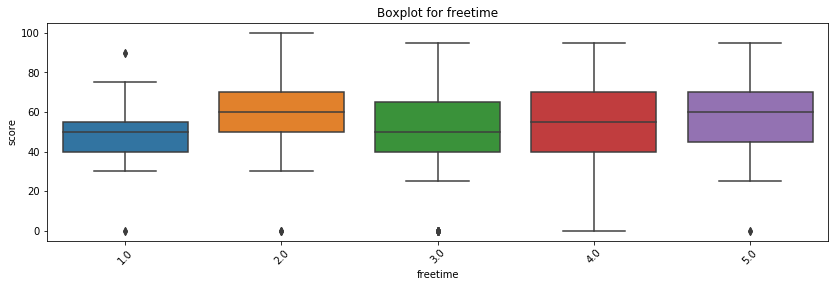

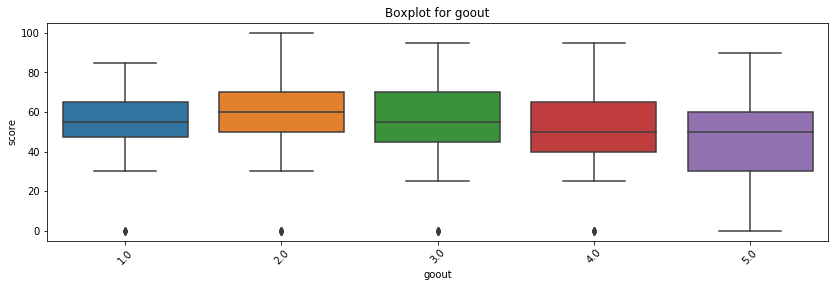

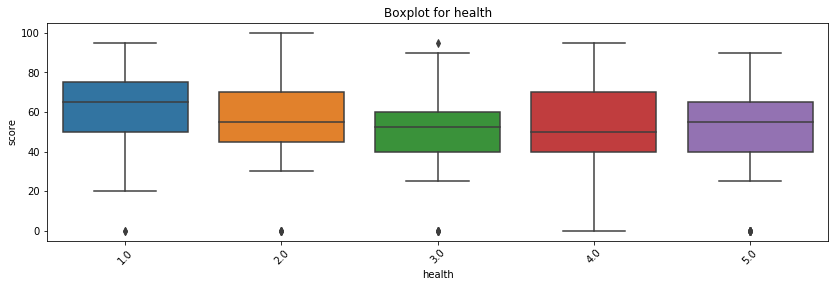

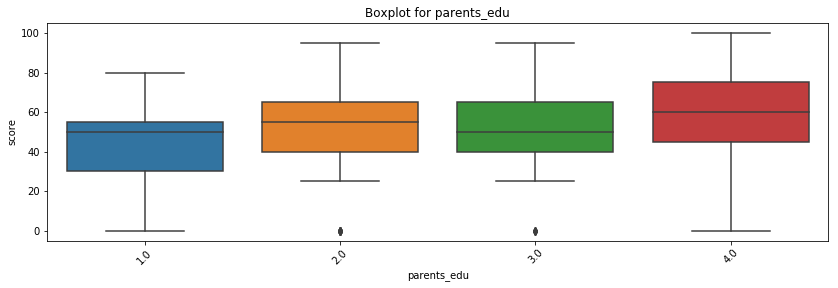

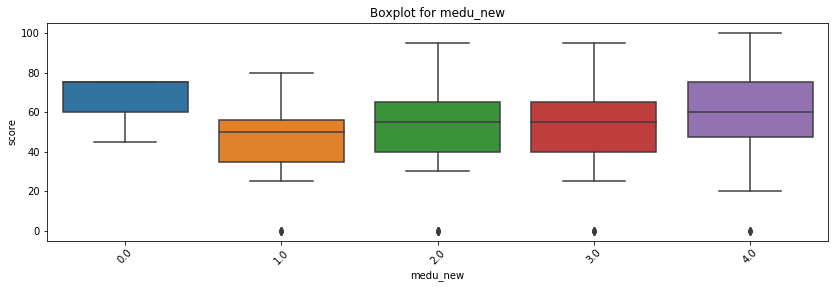

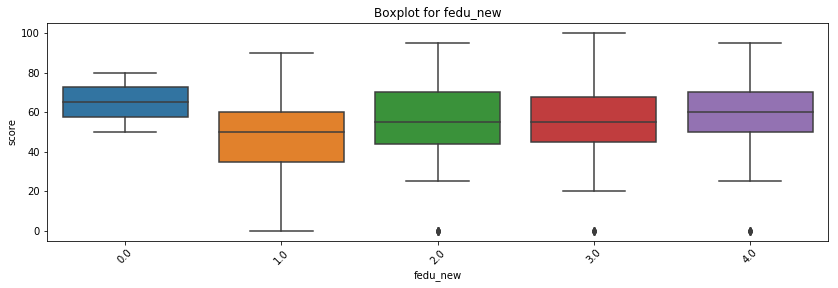

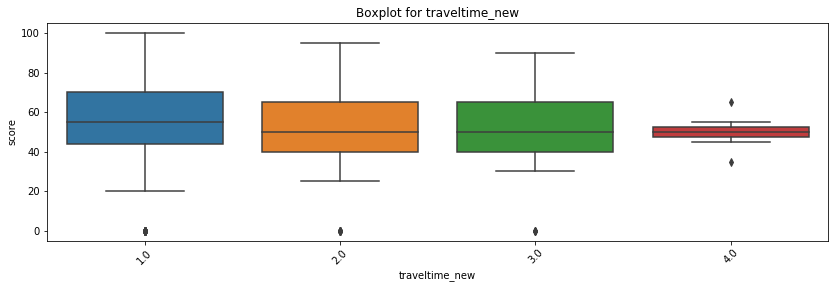

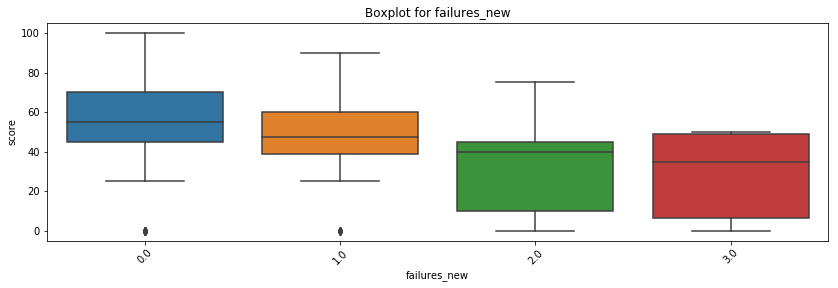

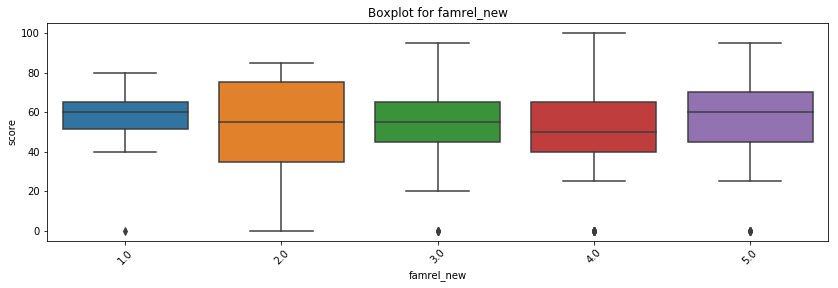

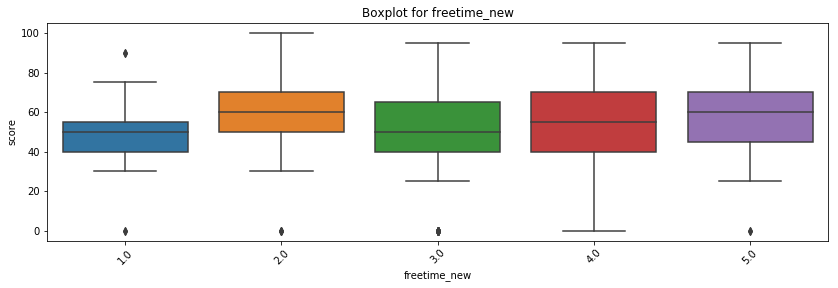

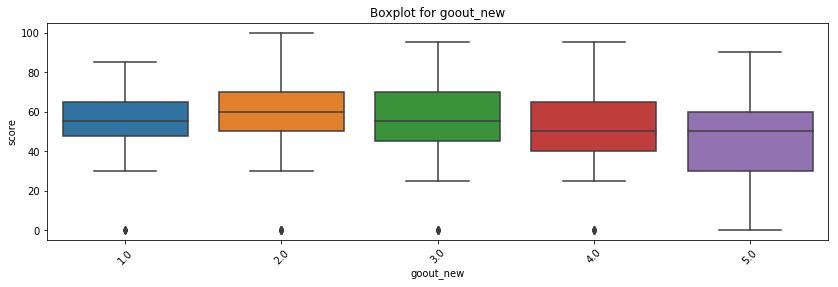

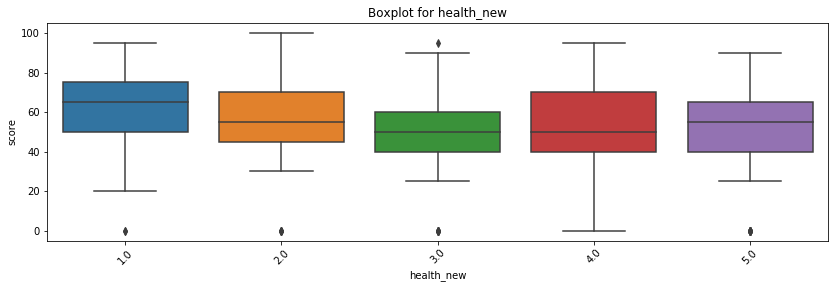

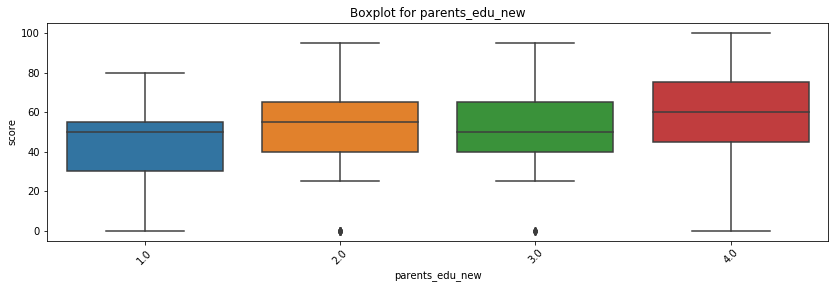

In [25]:
for col in [ 'medu', 'fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'parents_edu', 'medu_new', 'fedu_new', 'traveltime_new', 'failures_new', 'famrel_new', 'freetime_new', 'goout_new', 'health_new', 'parents_edu_new']:
    get_boxplot(col)

###### Предварительный анализ данных показал наличие большого числа пропущенных данных. Только 97 из 395 записей заполнены полностью. На следующем этапе обработки данных были заполнены пропуски - алгоритм заполнения подбирался в зависимости от типапеременной. При анализе обновленного массива данных были выявлены статистически значимые различия по полу (результаты мальчиков лучше, чем у девочек), по адресу проживания (результаты учеников, живущих в городе выше, чему у учеников, живущих за городом),  так же переменная mjob влияет на итоговый балл учащегося ( у матерей, работающих в сфере здравоохранения, дети достигают более высоких результатов в математике и скорее всего не попадут в группу риска.). Кроме того, schoolsup, higher, romantic, medu, failures, parents_edu тоже влияют на результат. Это справедливо для переменной score_change. Для переменной score из перечисленных переменных не выявлено влияние пола и интернета, но выявленно для переменной goout.  Обратная средняя корреляционная связь выявлена между параметром failures (0,35) и результатом экзамена. Количество внеучебных неудач уменьшает шанс успешно сдать экзамен по математике. Поэтому на данном этапе целесообразно оставить номинальные переменные: sex, address_new, mjob_new, parents_edu_new, schoolsup_new, higher_new, romantic_new, failures_new, goout_new, studytime_granular и количествееные переменные: absences (на данном этапе корреляционная связь не выявлена), score и score_change. 


In [26]:
stud_math_for_model = stud_math.loc[:, ['sex', 'address_new', 'mjob_new', 'parents_edu_new', 'schoolsup_new', 'higher_new', 'romantic_new', 'goout_new', 'failures_new', 'studytime_granular', 'absences_new', 'score', 'score_change']]
stud_math_for_model.head(30)

,sex,address_new,mjob_new,parents_edu_new,schoolsup_new,higher_new,romantic_new,goout_new,failures_new,studytime_granular,absences_new,score,score_change
0,F,U,at_home,4.0,yes,yes,no,4.0,0.0,-6.0,6.0,30.0,24.0
1,F,U,at_home,1.0,no,yes,no,3.0,0.0,-6.0,4.0,30.0,24.0
2,F,U,at_home,1.0,yes,yes,no,2.0,3.0,-6.0,10.0,50.0,44.0
3,F,U,health,4.0,no,yes,yes,2.0,0.0,-9.0,2.0,75.0,66.0
4,F,U,other,3.0,no,yes,no,2.0,0.0,-6.0,4.0,50.0,44.0
5,M,U,services,4.0,no,yes,no,2.0,0.0,-6.0,10.0,75.0,69.0
6,M,U,other,2.0,no,yes,no,4.0,0.0,-6.0,0.0,55.0,49.0
7,F,U,other,4.0,yes,yes,no,4.0,0.0,-6.0,6.0,30.0,24.0
8,M,U,services,3.0,no,yes,no,2.0,0.0,-6.0,0.0,95.0,89.0
9,M,U,other,4.0,no,yes,no,1.0,0.0,-6.0,0.0,75.0,69.0
